In [ ]:
!unzip /content/drive/MyDrive/PlantVillage.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato_Bacterial_spot/f2cfc53d-a165-47d5-a9ac-6877e52a97b6___GCREC_Bact.Sp 3804.JPG  
  inflating: __MACOSX/PlantVillage/Tomato_Bacterial_spot/._f2cfc53d-a165-47d5-a9ac-6877e52a97b6___GCREC_Bact.Sp 3804.JPG  
  inflating: PlantVillage/Tomato_Bacterial_spot/4c24021e-90e2-4b84-89c2-c904dc8bb0b4___GCREC_Bact.Sp 5706.JPG  
  inflating: __MACOSX/PlantVillage/Tomato_Bacterial_spot/._4c24021e-90e2-4b84-89c2-c904dc8bb0b4___GCREC_Bact.Sp 5706.JPG  
  inflating: PlantVillage/Tomato_Bacterial_spot/9be85690-9fdb-4ddd-b007-686bc4074786___GCREC_Bact.Sp 5780.JPG  
  inflating: __MACOSX/PlantVillage/Tomato_Bacterial_spot/._9be85690-9fdb-4ddd-b007-686bc4074786___GCREC_Bact.Sp 5780.JPG  
  inflating: PlantVillage/Tomato_Bacterial_spot/0b233197-cd35-4031-80c2-610e7e3a046b___GCREC_Bact.Sp 6095.JPG  
  inflating: __MACOSX/PlantVillage/Tomato_Bacterial_spot/._0b233197-cd35-4031-80c2-610e7e3a046b___GCREC_Bact.Sp 6095.JPG  
  inflati

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [ ]:
IMAGE_SIZE = 256
IMAGE_DIMS = (IMAGE_SIZE, IMAGE_SIZE, 3)
EPOCHS_NUM = 65
BATCH_SIZE = 32
TRAIN_SIZE = 0.8
VALIDATION_SIZE = 0.1
SHUFFLE = True
SHUFFLE_CONSTANT = 10000

In [ ]:
data = tf.keras.preprocessing.image_dataset_from_directory("/content/PlantVillage", shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                   batch_size = BATCH_SIZE)

Found 16011 files belonging to 10 classes.


In [ ]:
class_names = data.class_names
print(class_names)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
DATA_LEN = len(data)
train_size = round(DATA_LEN*TRAIN_SIZE)-1
validation_size = round(DATA_LEN*VALIDATION_SIZE)
if SHUFFLE:
    data = data.shuffle(SHUFFLE_CONSTANT, seed=1)
train_data = data.take(train_size)
valid_data = data.skip(train_size).take(validation_size)
test_data = data.skip(train_size+validation_size)


In [ ]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
valid_data= valid_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data= test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
preprocessed_data = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE,),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [ ]:
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)])

In [ ]:
model = models.Sequential([
    preprocessed_data,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')
])

model.build(input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3))

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs = EPOCHS_NUM, batch_size =BATCH_SIZE, verbose=1, validation_data = valid_data )

Epoch 1/65
400/400 [==============================] - 39s 41ms/step - loss: 1.2048 - accuracy: 0.5901 - val_loss: 1.2997 - val_accuracy: 0.6250
Epoch 2/65
400/400 [==============================] - 13s 32ms/step - loss: 0.6662 - accuracy: 0.7687 - val_loss: 0.8320 - val_accuracy: 0.7550
Epoch 3/65
400/400 [==============================] - 13s 32ms/step - loss: 0.5409 - accuracy: 0.8134 - val_loss: 0.8024 - val_accuracy: 0.7706
Epoch 4/65
400/400 [==============================] - 13s 32ms/step - loss: 0.4414 - accuracy: 0.8468 - val_loss: 1.0112 - val_accuracy: 0.7094
Epoch 5/65
400/400 [==============================] - 13s 32ms/step - loss: 0.4035 - accuracy: 0.8588 - val_loss: 0.6907 - val_accuracy: 0.8006
Epoch 6/65
400/400 [==============================] - 13s 32ms/step - loss: 0.3596 - accuracy: 0.8786 - val_loss: 0.9316 - val_accuracy: 0.7538
Epoch 7/65
400/400 [==============================] - 13s 32ms/step - loss: 0.3329 - accuracy: 0.8872 - val_loss: 0.5224 - val_accuracy:

In [ ]:
scores = model.evaluate(train_data)

400/400 [==============================] - 6s 14ms/step - loss: 0.0830 - accuracy: 0.9748


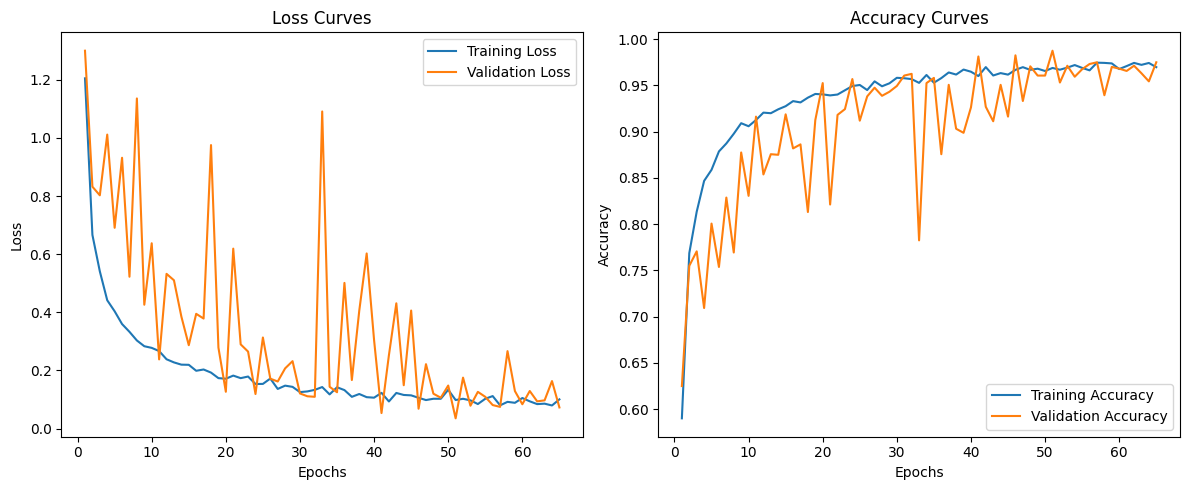

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS_NUM+ 1), training_loss, label='Training Loss')
plt.plot(range(1,EPOCHS_NUM + 1), validation_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS_NUM + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, EPOCHS_NUM + 1), validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
for images, labels in test_data.take(1):
  first_image_true_label = labels[0].numpy()
  print("actual label", class_names[first_image_true_label])
  first_image_predicted_label = np.argmax(model.predict(images)[0])
  print("predicted label", class_names[first_image_predicted_label])

actual label Tomato_Spider_mites_Two_spotted_spider_mite
1/1 [==============================] - 0s 37ms/step
predicted label Tomato_Spider_mites_Two_spotted_spider_mite


In [ ]:
def predict(model, img):
  im_arr = tf.keras.preprocessing.image.img_to_array(img)
  im_arr = tf.expand_dims(im_arr, 0)

  prediction_for_batch = model.predict(im_arr)

  predicted_label = class_names[np.argmax(prediction_for_batch[0])]
  confidence = round(100* (np.max(prediction_for_batch[0])),2)
  return predicted_label, confidence


1/1 [==============================] - 0s 18ms/step


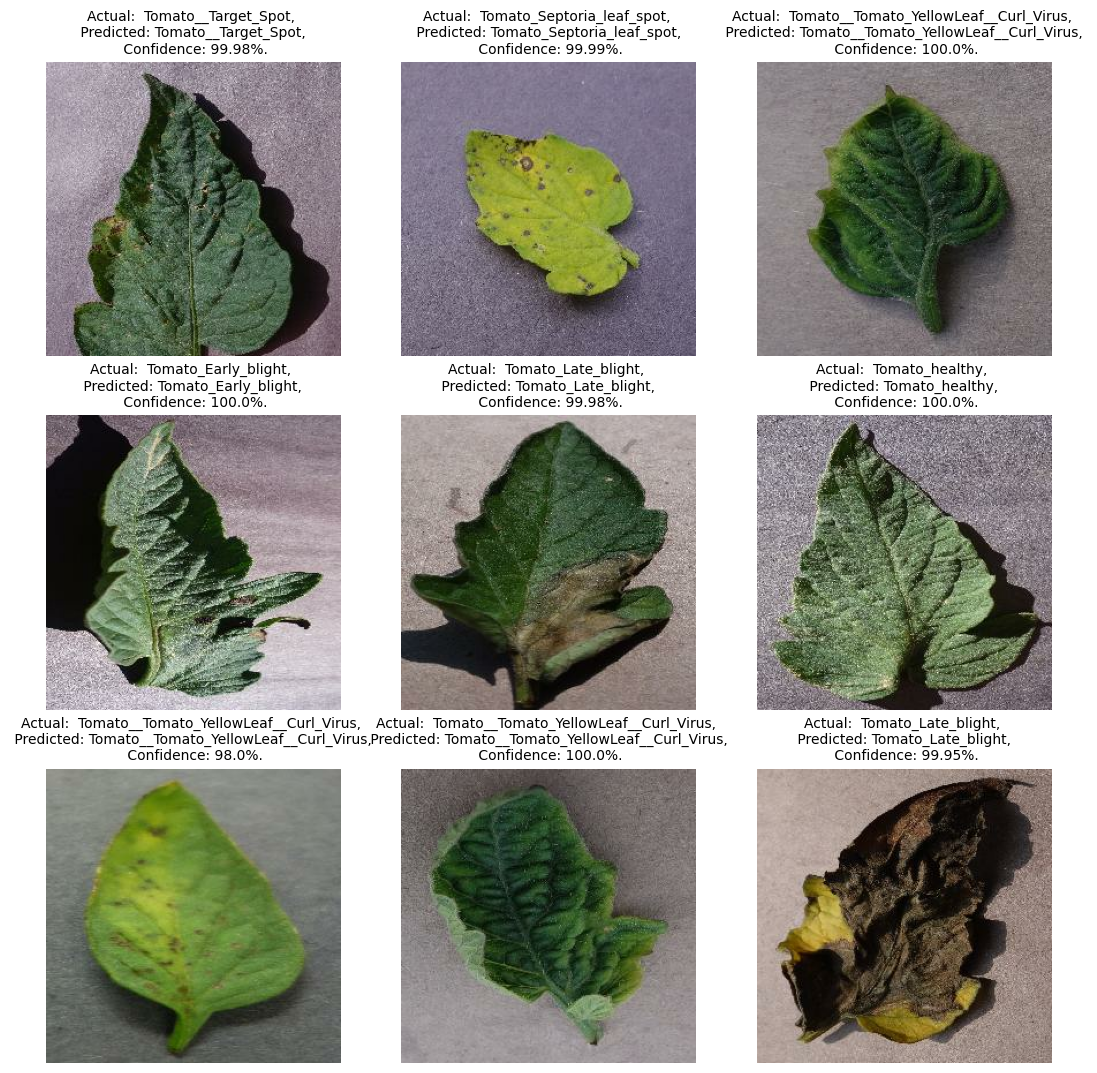

In [ ]:
for images, labels in test_data.take(1):
  plt.figure(figsize=(13, 13))
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_label, confidence = predict(model, images[i].numpy())
    actual_label = class_names[labels[i].numpy()]
    plt.title(f"Actual:  {actual_label}, \n Predicted: {predicted_label}, \n Confidence: {confidence}%.", fontsize=10)
    plt.axis("off")

plt.show()


In [ ]:
import os
model_version = max([int(i) for i in os.listdir("/content/models")]) + 1
model.save(f"/content/models/{model_version}")

In [ ]:
!ls

drive  __MACOSX  model1  model1.zip  PlantVillage  sample_data


In [ ]:
!zip -r model1.zip /content/model1


  adding: content/model1/ (stored 0%)
  adding: content/model1/saved_model.pb (deflated 88%)
  adding: content/model1/fingerprint.pb (stored 0%)
  adding: content/model1/keras_metadata.pb (deflated 92%)
  adding: content/model1/assets/ (stored 0%)
  adding: content/model1/variables/ (stored 0%)
  adding: content/model1/variables/variables.data-00000-of-00001 (deflated 32%)
  adding: content/model1/variables/variables.index (deflated 64%)


In [ ]:
from google.colab import files

files.download('/content/model1.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>